In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from skimage import io
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle


from google.colab import drive

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
X = np.load(open('drive/MyDrive/ml_files/X_test','rb'))
y = np.load(open('drive/MyDrive/ml_files/y_pred', 'rb'))

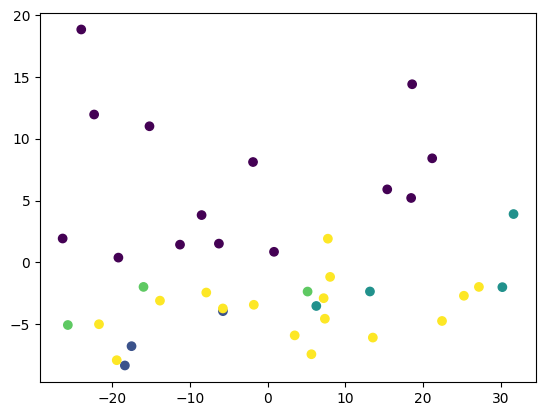

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
pcaX = pca.transform(X)

plt.scatter(pcaX[:,0],pcaX[:,1],c=y)

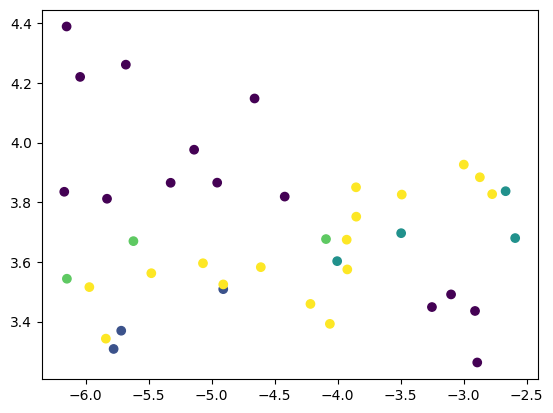

In [ ]:
tsne = TSNE(n_components=2)
tsneX = tsne.fit_transform(X)
plt.scatter(tsneX[:,0],tsneX[:,1],c=y)

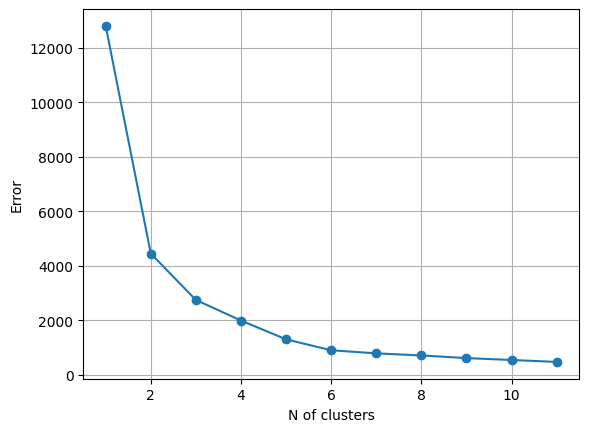

In [ ]:
Error =[]
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pcaX)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 12), Error, marker = 'o')
plt.xlabel('N of clusters')
plt.ylabel('Error')
plt.grid()
plt.show()

In [ ]:
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, kmeans_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)

For n_clusters = 2  silhouette average: 0.5188673236412178
For n_clusters = 3  silhouette average: 0.44617307444534726
For n_clusters = 4  silhouette average: 0.43024076091570274
For n_clusters = 5  silhouette average: 0.4659393279131809
For n_clusters = 6  silhouette average: 0.4978773199414747


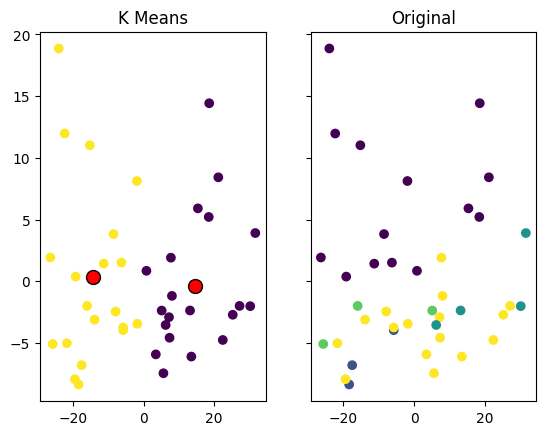

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
centers = pca.transform(kmeans.cluster_centers_)
labels = kmeans.labels_

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('K Means')
ax1.scatter(pcaX[:,0],pcaX[:,1],c=labels)
ax2.set_title("Original")
ax2.scatter(pcaX[:,0],pcaX[:,1],c=y)
ax1.scatter(centers[:, 0], centers[:, 1], marker='o', color = 'red', s = 100, edgecolor='black')

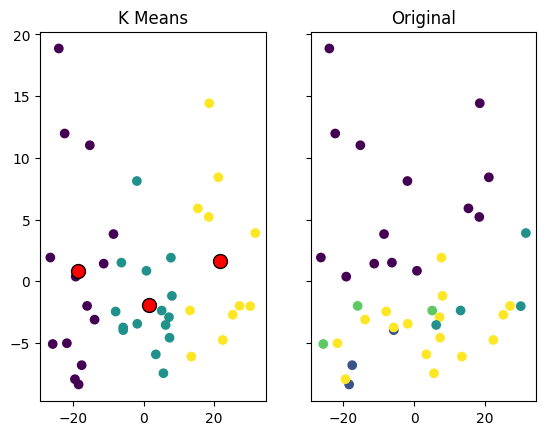

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
centers = pca.transform(kmeans.cluster_centers_)
labels = kmeans.labels_

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('K Means')
ax1.scatter(pcaX[:,0],pcaX[:,1],c=labels)
ax2.set_title("Original")
ax2.scatter(pcaX[:,0],pcaX[:,1],c=y)
ax1.scatter(centers[:, 0], centers[:, 1], marker='o', color = 'red', s = 100, edgecolor='black')

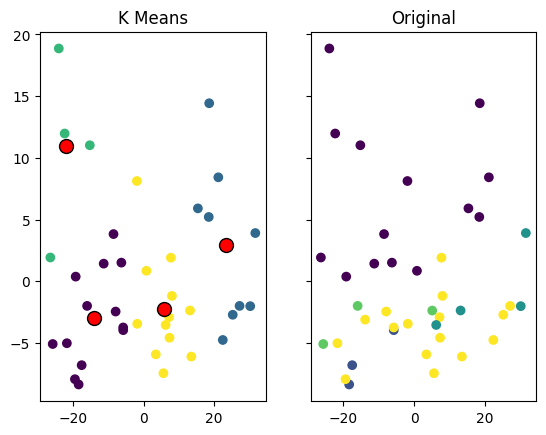

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
centers = pca.transform(kmeans.cluster_centers_)
labels = kmeans.labels_

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('K Means')
ax1.scatter(pcaX[:,0],pcaX[:,1],c=labels)
ax2.set_title("Original")
ax2.scatter(pcaX[:,0],pcaX[:,1],c=y)
ax1.scatter(centers[:, 0], centers[:, 1], marker='o', color = 'red', s = 100, edgecolor='black')

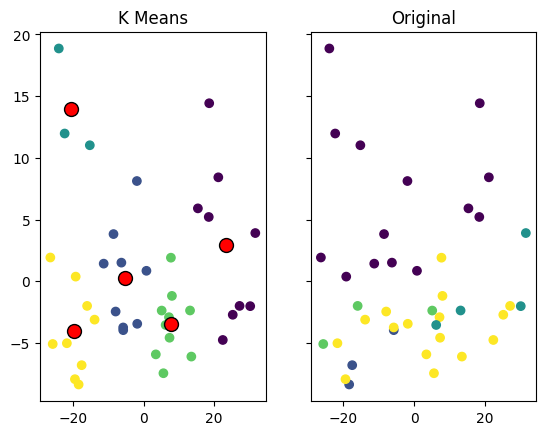

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
centers = pca.transform(kmeans.cluster_centers_)
labels = kmeans.labels_

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('K Means')
ax1.scatter(pcaX[:,0],pcaX[:,1],c=labels)
ax2.set_title("Original")
ax2.scatter(pcaX[:,0],pcaX[:,1],c=y)
ax1.scatter(centers[:, 0], centers[:, 1], marker='o', color = 'red', s = 100, edgecolor='black')

In [ ]:
pigs = io.imread('drive/MyDrive/ml_files/micropigs.jpeg')
pigs = np.array(pigs, dtype=np.float64) / 255
w, h, d = original_shape = tuple(pigs.shape)
pigs_array = np.reshape(pigs, (w * h, d))

In [ ]:
range()

In [ ]:
n_colors = [64, 32, 16, 8]
image_array_sample = shuffle(pigs_array, random_state=0, n_samples=1_000)

results = []
for i in n_colors:
  kmeans = KMeans(n_clusters=i, n_init="auto", random_state=0).fit(
      image_array_sample
  )
  labels = kmeans.predict(pigs_array)
  results.append((i, kmeans.cluster_centers_[labels]))


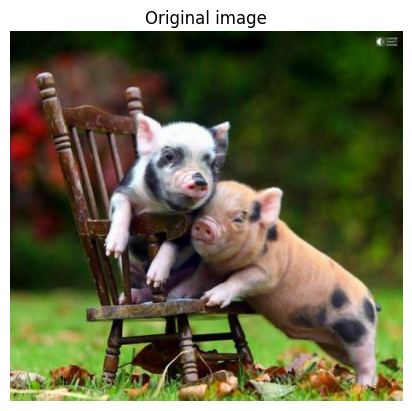

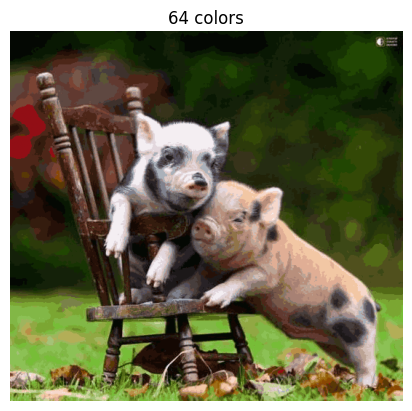

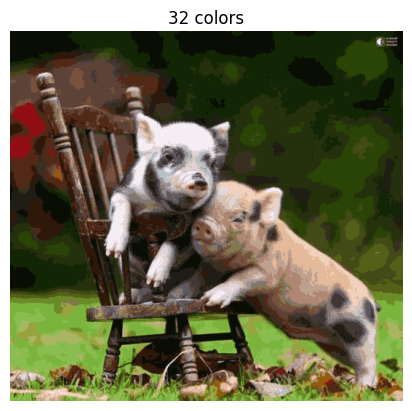

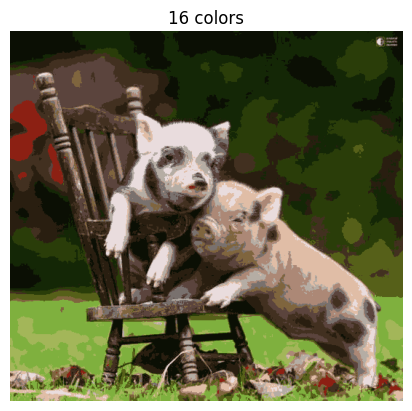

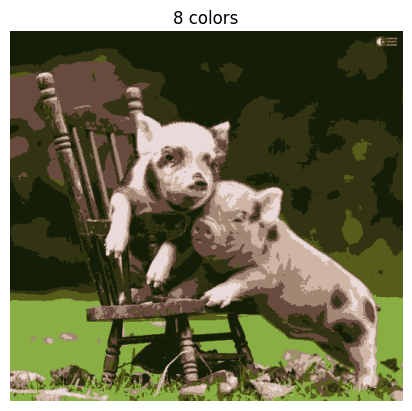

In [ ]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(pigs)
for i, data in enumerate(results):
  plt.figure(i+2)
  plt.clf()
  plt.axis("off")
  plt.title(f"{data[0]} colors")
  plt.imshow(data[1].reshape(w, h, -1))

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

In [26]:
df = pd.read_csv('drive/MyDrive/ml_files/threads_reviews.csv', usecols=['review_description', 'rating'])
df.head()

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,2
1,Pretty good for a first launch!! Its easy to u...,3
2,"For a brand new app, it's very well optimized....",3
3,"Great app with a lot of potential! However, th...",3
4,"The app is good, but it needs a lot of functio...",3


In [28]:
score_to_word_map = {
    1: 'bad',
    2: 'bad',
    3: 'ok',
    4: 'good',
    5: 'good',
}
df['rating'] = df['rating'].apply(lambda x: score_to_word_map[x])
df.head()

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,bad
1,Pretty good for a first launch!! Its easy to u...,ok
2,"For a brand new app, it's very well optimized....",ok
3,"Great app with a lot of potential! However, th...",ok
4,"The app is good, but it needs a lot of functio...",ok


In [29]:
Counter(df['rating'])

Counter({'bad': 11522, 'ok': 2585, 'good': 18803})

In [32]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
def text_preprocessing(text: str):
  text = text.lower()
  text = re.sub("#\S+", " ", text)
  text = re.sub("\d", " ", text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\s{2,}', " ", text)
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df['review_description'] = df['review_description'].apply(lambda x: text_preprocessing(x))
df['review_description']

0        meh greatest experience chromebook seems custo...
1        pretty good first launch easy use self explana...
2        brand new app well optimized however missing q...
3        great app lot potential however lot needs fixe...
4        app good needs lot functionality example searc...
                               ...                        
32905       killed dog mark zuckerburg strangled dog gone 
32906                     add search hashtag like twitter 
32907                                          bad twister
32908                              yet another trash meta 
32909                     nothing special app copy twitter
Name: review_description, Length: 32910, dtype: object

In [37]:
from wordcloud import WordCloud
def visualize(label):
    text = ''
    for msg in df[df['rating'] == label]['review_description']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

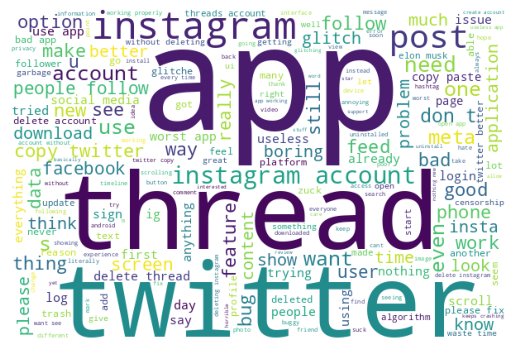

In [40]:
visualize('bad')

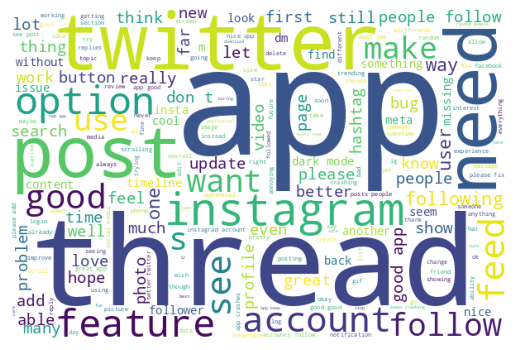

In [41]:
visualize('ok')

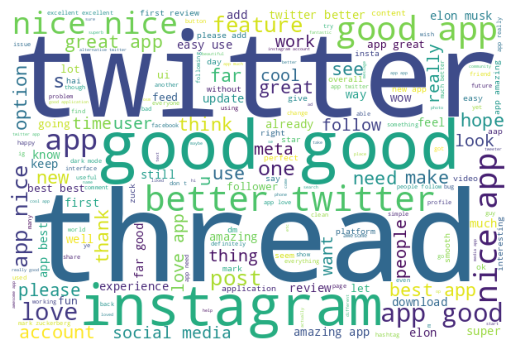

In [42]:
visualize('good')

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review_description'], df['rating'], test_size=0.20)
print(X_train.shape, y_train.shape)

(26328,) (26328,)


In [45]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [62]:
clf = MultinomialNB(alpha=1)
clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.78      0.75      0.77      2294
        good       0.81      0.91      0.86      3765
          ok       0.31      0.08      0.12       523

    accuracy                           0.79      6582
   macro avg       0.63      0.58      0.58      6582
weighted avg       0.76      0.79      0.77      6582



In [64]:
print(confusion_matrix(y_test, y_pred))

[[1730  522   42]
 [ 284 3435   46]
 [ 204  279   40]]
